## 7장의 내용 구성
* Chapter 개요
* Numerical Libraries (NumPy, Pandas, SciPy)
* Financial Libraries (QuantLib, PyAlgoTrade, Zipline, pyfolio)
* Visualization Tools (Matplotlib, Plotly, Seaborn 등)
* Git을 활용한 협업

## 숫자 라이브러리 (1)

1. 단순 이동 평균 전략 최적화 (SciPy + NumPy)
* 설명: SciPy의 minimize()를 이용해 이동 평균 전략의 최적 기간을 찾음.

In [59]:
import numpy as np
from scipy.optimize import minimize

def simple_moving_average_strategy(params, prices):
    short_window, long_window = int(params[0]), int(params[1]) #오류가 발생하여 타입 변경함
    short_sma = np.mean(prices[-short_window:])
    long_sma = np.mean(prices[-long_window:])
    # print("short_sma >>>", short_sma)
    # print("long_sma >>>", long_sma)
    # print("short_sma - long_sma >>>", short_sma - long_sma)
    return short_sma - long_sma

price_data = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
initial_guess = [3, 7]
result = minimize(simple_moving_average_strategy, initial_guess, args=(price_data))
optimal_short_window, optimal_long_window = result.x

print("\n\nOptimal Short Window:", optimal_short_window)
print("Optimal Long Window:", optimal_long_window)




Optimal Short Window: 3.0
Optimal Long Window: 7.0


## NumPy (2~5)

2. NumPy 기초: 배열 생성
* 설명: NumPy 배열을 생성하여 주가 데이터를 저장하는 기본 예제.

In [60]:
import numpy as np
stock_prices = np.array([100.0, 102.5, 105.2, 103.8, 107.1])
print(stock_prices)

[100.  102.5 105.2 103.8 107.1]


3. 일일 수익률 계산
* 설명: 주가의 일일 수익률 계산. 배열 인덱싱으로 전일 대비 수익률 도출.

* 일일 수익률이란
    * 오늘 종가에서 전일 종가를 뺀 차액 오늘?전일? 종가로 나눈 값이다.

In [63]:
import numpy as np
daily_prices = np.array([100.0, 102.5, 105.2, 103.8, 107.1])
returns = (daily_prices[1:] - daily_prices[:-1]) / daily_prices[:-1]
print("1) daily_prices[1:] >>>", daily_prices[1:])
print("2) daily_prices[:-1] >>>", daily_prices[:-1])
print("3) daily_prices[1:] - daily_prices[:-1] >>>", daily_prices[1:] - daily_prices[:-1])
print("3번을 2번으로 나누면 >>>", returns)

1) daily_prices[1:] >>> [102.5 105.2 103.8 107.1]
2) daily_prices[:-1] >>> [100.  102.5 105.2 103.8]
3) daily_prices[1:] - daily_prices[:-1] >>> [ 2.5  2.7 -1.4  3.3]
3번을 2번으로 나누면 >>> [ 0.025       0.02634146 -0.01330798  0.03179191]


4. 수익률 정규화
* 설명: 평균을 빼서 수익률을 정규화 (평균 0).

* 배열의 각 요소에서 평균을 뺸다.

In [67]:
import numpy as np
returns = np.array([0.02, -0.01, 0.03, -0.02, 0.04])
normalized_returns = returns - np.mean(returns)

print("returns >>>", returns)
print("np.mean(returns) >>>", np.mean(returns))
print("normalized_returns >>>", normalized_returns)


returns >>> [ 0.02 -0.01  0.03 -0.02  0.04]
np.mean(returns) >>> 0.012
normalized_returns >>> [ 0.008 -0.022  0.018 -0.032  0.028]


5. 이동 평균 계산 (전략 구현)
* 설명: 전략에 필요한 단기/장기 이동 평균 계산 (데이터 부족 시 long SMA는 NaN 가능성 있음).

* 뒤에서 몇개

In [69]:
import numpy as np
stock_prices = np.array([100.0, 102.5, 105.2, 103.8, 107.1])
short_window = 3 #5
long_window = 5 #20
short_sma = np.mean(stock_prices[-short_window:])
long_sma = np.mean(stock_prices[-long_window:])

print("stock_prices[-short_window:] >>>", stock_prices[-short_window:])
print("stock_prices[-long_window:] >>>", stock_prices[-long_window:])

print("\nshort_sma >>>", short_sma)
print("long_sma >>>", long_sma)


stock_prices[-short_window:] >>> [105.2 103.8 107.1]
stock_prices[-long_window:] >>> [100.  102.5 105.2 103.8 107.1]

short_sma >>> 105.36666666666667
long_sma >>> 103.72


## Pandas (6~9)

6. Pandas를 활용한 데이터 불러오기 및 수익률 계산
* 설명: CSV에서 데이터 불러와 특정 종목 필터링 후 일일 수익률 계산.
* pandas pct_change() 활용

In [72]:
import pandas as pd
stock_data = pd.read_csv('stock_prices.csv')

apple_stock = stock_data[stock_data['Symbol'] == 'AAPL'].copy()
apple_stock['Daily Returns'] = apple_stock['Close'].pct_change() # 수익률을 계산하여 열을 추가함

print("apple_stock >>>\n", apple_stock)
print("\n종가: apple_stock['Close'] >>>\n", apple_stock['Close'])
print("\n수익률: apple_stock['Daily Returns'] >>>\n", apple_stock['Daily Returns'])
print("\n확인: (152-150)/150 >>>", (152-150)/150)


apple_stock >>>
          Date Symbol  Close  Daily Returns
0  2023-01-01   AAPL    150            NaN
1  2023-01-02   AAPL    152       0.013333
2  2023-01-03   AAPL    149      -0.019737
3  2023-01-04   AAPL    155       0.040268
4  2023-01-05   AAPL    158       0.019355

종가: apple_stock['Close'] >>>
 0    150
1    152
2    149
3    155
4    158
Name: Close, dtype: int64

수익률: apple_stock['Daily Returns'] >>>
 0         NaN
1    0.013333
2   -0.019737
3    0.040268
4    0.019355
Name: Daily Returns, dtype: float64

확인: (152-150)/150 >>> 0.013333333333333334


7. 결측치 처리
* 설명: 거래량 데이터의 결측치를 앞의 값으로 채움 (forward fill).

In [62]:
import pandas as pd
trading_volume_data = pd.read_csv('trading_volume_data.csv')
print("\n결측치 보정 전:")
print(trading_volume_data)
#trading_volume_data['Volume'] = trading_volume_data['Volume'].fillna(method='ffill')
trading_volume_data['Volume'] = trading_volume_data['Volume'].ffill()
print("\n결측치 보정 후:")
print(trading_volume_data)


결측치 보정 전:
         Date   Volume
0  2023-01-01  12000.0
1  2023-01-02      NaN
2  2023-01-03      NaN
3  2023-01-04  14500.0
4  2023-01-05  15000.0
5  2023-01-06      NaN
6  2023-01-07  11000.0
7  2023-01-08      NaN
8  2023-01-09   9500.0
9  2023-01-10  13200.0

결측치 보정 후:
         Date   Volume
0  2023-01-01  12000.0
1  2023-01-02  12000.0
2  2023-01-03  12000.0
3  2023-01-04  14500.0
4  2023-01-05  15000.0
5  2023-01-06  15000.0
6  2023-01-07  11000.0
7  2023-01-08  11000.0
8  2023-01-09   9500.0
9  2023-01-10  13200.0


8-1. 시간 기반 리샘플링 및 이동 평균
* 설명: 시계열 데이터를 시간 단위로 집계하고, 10기간 이동 평균 계산.

* 샘플 데이터가 "시"를 기준으로 9개인 데이터이므로 이동평균 10기간은 불가하여
    * window를 5로 조정함

In [73]:
import pandas as pd
intraday_data = pd.read_csv('intraday_prices.csv', parse_dates=['Timestamp'])
print("1) 원본 >>>\n", intraday_data.head())
hourly_data = intraday_data.resample('h', on='Timestamp').mean()
print("\n2) 시간 단위로 집계 >>>")
print(hourly_data.head())
hourly_data['Hourly Moving Average'] = hourly_data['Price'].rolling(window=5).mean()
print("\n3) 5시간 이동 평균 계산 >>>")
print(hourly_data.head())




1) 원본 >>>
             Timestamp   Price
0 2023-01-01 09:00:00  100.10
1 2023-01-01 09:05:00   99.63
2 2023-01-01 09:10:00   99.67
3 2023-01-01 09:15:00  100.35
4 2023-01-01 09:20:00  100.78

2) 시간 단위로 집계 >>>
                          Price
Timestamp                      
2023-01-01 09:00:00  100.531667
2023-01-01 10:00:00  102.075833
2023-01-01 11:00:00  102.881667
2023-01-01 12:00:00  104.145000
2023-01-01 13:00:00  105.364167

3) 5시간 이동 평균 계산 >>>
                          Price  Hourly Moving Average
Timestamp                                             
2023-01-01 09:00:00  100.531667                    NaN
2023-01-01 10:00:00  102.075833                    NaN
2023-01-01 11:00:00  102.881667                    NaN
2023-01-01 12:00:00  104.145000                    NaN
2023-01-01 13:00:00  105.364167             102.999667


8-2. 주식 기호별 연간 수익률 계산
* 설명: Symbol별 평균 수익률 계산
* groupby()를 활용하여 집계

In [75]:
import pandas as pd

portfolio_data = pd.read_csv("portfolio_returns.csv")
annualized_returns = portfolio_data.groupby("Symbol")["Returns"].mean() * 252
print(annualized_returns)

Symbol
AAPL     0.113789
GOOGL    0.207138
MSFT    -0.213380
TSLA     0.786187
Name: Returns, dtype: float64


9. 포트폴리오 최적화 계산
* 설명:
    * 수익률, 평균 수익률, 변동성 산출
    * 연간 수익률과 변동성을 추정

In [80]:
import pandas as pd
import numpy as np

price_data = pd.read_csv('historical_prices.csv', parse_dates=['Date'])
volume_data = pd.read_csv('trading_volumes.csv', parse_dates=['Date'])
merged_data = pd.merge(price_data, volume_data, on=['Date', 'Symbol'])  #종가와 거래량을 일자와 심볼로 병합(병합조건 심볼 추가함)

print("\nprice_data.head() >>>\n",price_data.head())
print("\nvolume_data.head() >>>\n",volume_data.head())
print("\nmerged_data.head() >>>\n",merged_data.head())


price_data.head() >>>
         Date Symbol   Close
0 2023-01-01   AAPL  149.84
1 2023-01-02   AAPL  151.32
2 2023-01-03   AAPL  151.05
3 2023-01-04   AAPL  151.34
4 2023-01-05   AAPL  150.79

volume_data.head() >>>
         Date Symbol  Volume
0 2023-01-01   AAPL   16084
1 2023-01-02   AAPL   10337
2 2023-01-03   AAPL   15716
3 2023-01-04   AAPL   19018
4 2023-01-05   AAPL   11150

merged_data.head() >>>
         Date Symbol   Close  Volume
0 2023-01-01   AAPL  149.84   16084
1 2023-01-02   AAPL  151.32   10337
2 2023-01-03   AAPL  151.05   15716
3 2023-01-04   AAPL  151.34   19018
4 2023-01-05   AAPL  150.79   11150


In [ ]:
# 수익률, 평균 수익률, 변동성 산출

merged_data['Returns'] = merged_data.groupby('Symbol')['Close'].pct_change()  #수익률
returns = merged_data.groupby('Symbol')['Returns'].mean()  #평균 수익률
volatility = merged_data.groupby('Symbol')['Returns'].std()  #변동성

print("\nreturns.head() >>>\n",returns.head())
print("\nvolatility.head() >>>\n",volatility.head())


returns.head() >>>
 Symbol
AAPL    0.004725
MSFT   -0.000512
Name: Returns, dtype: float64

volatility.head() >>>
 Symbol
AAPL    0.005907
MSFT    0.002277
Name: Returns, dtype: float64


In [ ]:
# 연간 수익률과 변동성을 추정

# 포토풀리오 구성을 위해 평균 분산 최적화를 수행
cov_matrix = merged_data.pivot_table(index='Date', columns='Symbol', values='Returns').cov() #두 심볼(주식) 간의 공분산? 두 주식간에 얼마나 의존하는지.

# 무작위 포토폴리오 가중치 생성
weights = np.random.random(len(returns))
weights /= np.sum(weights)

print("\ncov_matrix.head() >>>\n",cov_matrix.head())
print("\nweights >>>",weights)

# 포토폴리오 수익률 및 변동성 계산하기
portfolio_return = np.sum(weights * returns) * 252
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

print("\nportfolio_return) >>>",portfolio_return)
print("\nportfolio_volatility >>>",portfolio_volatility)


cov_matrix.head() >>>
 Symbol      AAPL      MSFT
Symbol                    
AAPL    0.000035  0.000004
MSFT    0.000004  0.000005

weights >>> [0.50724216 0.49275784]

portfolio_return) >>> 0.540413409737189

portfolio_volatility >>> 0.05543645005546525


1. weights – 자산 비중
    - weights = [0.50724216 0.49275784]
    - 전체 투자금 중 50.7%는 AAPL에, 49.2%는 MSFT에 투자
    - 이 비율은 np.random.random()으로 생성된 무작위 분산 투자 예시

2. portfolio_return = 0.540413409737189 → 연간 기대 수익률 ≒ 54.0%
    - 이 포트폴리오에 1년간 투자하면 이론적으로 약 54.0% 수익을 기대할 수 있음
    - 단, 이는 과거 수익률의 평균을 기반으로 추정된 기대값임
    - 매우 높은 수익률로, 일반적으로는 비현실적으로 낙관적인 시나리오일 수 있음 → 백테스트 데이터 확인 필요

3. portfolio_volatility = 0.05543645005546525 → 연간 변동성 ≒ 5.55%
    - 포트폴리오 수익률이 평균으로부터 5.55% 내외로 흔들릴 가능성
    - 낮을수록 안정적, 높을수록 불확실성 큼

## SciPy (10~14)

* NumPy의 확장판
* 광범위한 과학 및 기술 컴퓨팅 도구 모음을 제공

10. SciPy의 최적화 기능
* 설명:
    * prices: 모의 주가 데이터
    * moving_average_objective: 단기/장기 이동 평균 차이를 최대화하는 함수
    * minimize: SciPy의 최적화 함수 (단기/장기 기간 조합 찾기)

In [19]:
from scipy.optimize import minimize
import numpy as np

# 모의 주가 데이터 생성 (100개)
prices = np.random.rand(100)   # 예: 0~100 사이 임의 값
print("prices >>>", prices[:5])

# 이동 평균에 대한 짧은 기간과 긴 기간을 정의
short_window = 5
long_window = 20

# 최적화 목적 함수 정의
def moving_average_objective(params, prices):
    short_window, long_window = int(params[0]), int(params[1])
    short_ma = np.mean(prices[-short_window:])
    long_ma = np.mean(prices[-long_window:])
    return -short_ma + long_ma

# 초기값 및 최적화 수행
initial_guess = [5, 20]
result = minimize(moving_average_objective, initial_guess, args=(prices,))

print("\nresult >>>\n", result)

# 최적화 결과 출력
optimal_short_window, optimal_long_window = result.x
print(f"\nOptimal Short Window: {int(optimal_short_window)}")
print(f"Optimal Long Window: {int(optimal_long_window)}")


prices >>> [0.59087667 0.19103306 0.44745646 0.52361097 0.75500918]

result >>>
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.24788628056511197
        x: [ 5.000e+00  2.000e+01]
      nit: 0
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1

Optimal Short Window: 5
Optimal Long Window: 20


11. 위험대비 수익률 목표에 맞는 포트폴리오 최적화 코드
* 설명:
    * returns: 각 자산의 연간 기대 수익률 (100개 자산)
    * cov_matrix: 수익률 간의 공분산 행렬 (위험 척도)
    * portfolio_objective(): 샤프 비율을 최대화하는 함수 (부호 반전으로 최소화)
    * minimize(): 제약 조건 하에서 최적의 자산 비중 탐색
    * optimal_weights: 수익률 대비 리스크가 가장 이상적인 자산 비중 조합

In [76]:
from scipy.optimize import minimize
import numpy as np

# 모의 수익률 데이터 (100개 자산)
np.random.seed(42)
returns = np.random.rand(100)

# 모의 공분산 행렬 (양의 정부호 행렬 생성)
cov_matrix = np.random.rand(100, 100)
cov_matrix = np.dot(cov_matrix, cov_matrix.T)  # 대칭 & 양의정부호로 만듦

# 무위험 수익률
risk_free_rate = 0.02

# 포토폴리오 최적화를 위한 목적 함수
def portfolio_objective(weights, returns):
    portfolio_return = np.sum(weights * returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    # Sharpe Ratio를 최대화 → 음수로 만들어 minimize()에 사용
    # 부호 반전 → 최소화 문제로 변환
    return -((portfolio_return - risk_free_rate) / portfolio_risk)

# 초기값: 동일 가중치
initial_weights = np.ones(len(returns)) / len(returns)

# 최적화 실행
result = minimize(portfolio_objective, initial_weights, args=(returns,))

# 결과 출력
optimal_weights = result.x
print("최적 포트폴리오 비중 (앞 10개):", np.round(optimal_weights[:10], 4))


최적 포트폴리오 비중 (앞 10개): [ 412.4279  204.398  -107.112    78.6075 -125.5429 -237.031   436.6203
  114.251   136.6368 -122.0467]


In [77]:
optimal_weights  #optimal_weights: 수익률 대비 리스크가 가장 이상적인 자산 비중 조합

array([ 412.42786153,  204.3979847 , -107.11202745,   78.60746217,
       -125.54292961, -237.03101508,  436.62031483,  114.25099014,
        136.63683176, -122.04674696, -593.43137761,  231.14615457,
        620.82949583,  170.89074313, -413.17345087, -681.78875216,
        -81.47492009,  415.28480472, -430.52844006, -225.73995515,
       -107.90913885, -575.18482679,  165.72551762,  -95.00733166,
        -56.07682567,    6.84683755,  555.99816955,  789.58675461,
       -358.26951769,   66.7288268 , -186.89002775, -958.93920441,
        200.81225955, -208.29149868,  332.96235735, -211.20554229,
        292.81284844, -559.92986297, -318.27181224,  195.38700117,
        156.72583899, -205.63333212,   26.23562098,  668.25276425,
         69.60364001, -328.41697523,  990.0677894 ,  425.67291179,
        -73.20474348,  -51.19917004,  141.68986197,  256.53272189,
       -400.38993586, -315.16774961, -389.84408589, -379.37320914,
       -677.32226617,  551.09027202,  -51.55916138,  222.18307

In [87]:
optimal_weights.sum() #전체 자산 비중의 합

51.33989790116112

In [86]:
returns  #returns: 각 자산의 연간 기대 수익률 (100개 자산)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685

In [88]:
initial_weights  #초기값: 동일 가중치

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [89]:
cov_matrix  #cov_matrix: 수익률 간의 공분산 행렬 (위험 척도)

array([[33.28914889, 24.52168683, 24.35061896, ..., 26.75994441,
        24.68963772, 24.09099148],
       [24.52168683, 35.31491104, 23.59072074, ..., 26.49619214,
        25.35303992, 26.25305628],
       [24.35061896, 23.59072074, 32.64803446, ..., 27.22714182,
        25.34970149, 24.05640439],
       ...,
       [26.75994441, 26.49619214, 27.22714182, ..., 36.16989456,
        26.71531025, 27.35292886],
       [24.68963772, 25.35303992, 25.34970149, ..., 26.71531025,
        31.48931511, 23.74411011],
       [24.09099148, 26.25305628, 24.05640439, ..., 27.35292886,
        23.74411011, 34.44227886]])

12. Black-Scholes-Merton 방정식
* 설명:
    * black_scholes_merton(): Black-Scholes 공식의 시간 흐름에 따른 미분 방정식 표현
    * solve_ivp(): SciPy의 수치적분 함수로 위 방정식을 푸는 도구
    * y0: 만기 시점에서의 옵션 가격 (즉시 행사할 경우)
    * solution.y[0]: 옵션 가격의 시간 변화 결과
    * plt.plot(): 시간에 따른 옵션 가격 그래프 시각화

In [ ]:
!pip install matplotlib

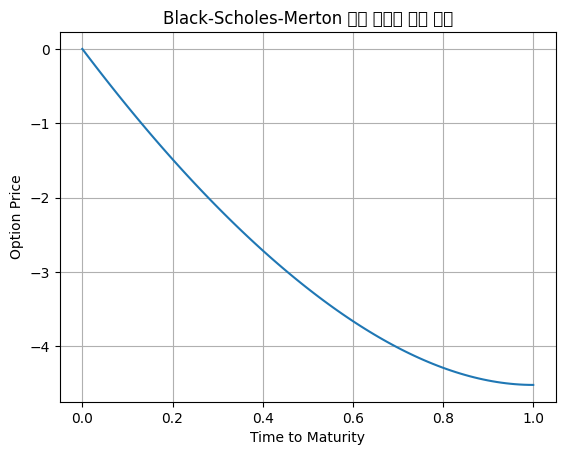

In [94]:
from scipy.stats import norm
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# 옵션 기본 파라미터
S = 100     # 현재 주가
K = 105     # 행사가격
T = 1.0     # 만기까지 시간 (1년)
r = 0.05    # 무위험 수익률
sigma = 0.2 # 변동성

# Black-Scholes-Merton 미분방정식 정의
def black_scholes_merton(t, y):
    if T - t == 0:
        return 0
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    # 수치 적분용 도함수 정의: dy/dt
    return r * y[0] - S * norm.cdf(d1) + K * np.exp(-r * (T - t)) * norm.cdf(d2)


# 초기 조건 (만기 시점에서 옵션 가치는 max(S - K, 0))
y0 = max(S - K, 0)

# 시간 범위 (0년 ~ 1년, 100개의 구간)
t_span = [0, T]

# 미분방정식 풀기
solution = solve_ivp(black_scholes_merton, t_span, [y0], t_eval=np.linspace(*t_span, 100))

# 결과 시각화
plt.plot(solution.t, solution.y[0])
plt.title("Black-Scholes-Merton 옵션 가격의 시간 변화")
plt.xlabel("Time to Maturity")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

In [97]:
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
        y: [[ 0.000e+00 -8.072e-02 ... -4.517e+00 -4.518e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0


"Black-Scholes-Merton 모델에서 옵션 가격은 음수가 될 수 없습니다."

다음은 챗GPT가 수정해 준 코드입니다.

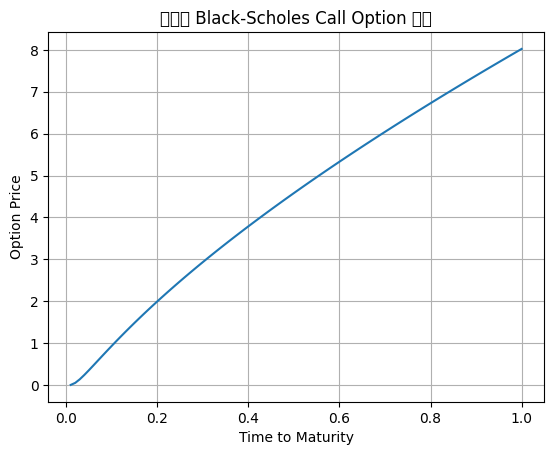

In [99]:
from scipy.stats import norm
import numpy as np

S = 100     # 현재 주가
K = 105     # 행사가격
T = 1.0     # 만기까지 시간 (1년)
r = 0.05    # 무위험 수익률
sigma = 0.2 # 변동성

def call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# 시간별 옵션 가격 변화 확인
time_grid = np.linspace(0.01, 1, 100)  # 0 → 1년
prices = [call_option_price(S=S, K=K, T=t, r=r, sigma=sigma) for t in time_grid]

import matplotlib.pyplot as plt
plt.plot(time_grid, prices)
plt.title("정확한 Black-Scholes Call Option 가격")
plt.xlabel("Time to Maturity")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

In [107]:
print(prices)

[0.005334734647497119, 0.05432498766598304, 0.1403571082149302, 0.2443083188633839, 0.3564660176106482, 0.47210812597831264, 0.5888291578403511, 0.7053531217713314, 0.8209884340173161, 0.9353613806114893, 1.0482779418736143, 1.159648541419891, 1.269445372049418, 1.3776773907564106, 1.4843752815620412, 1.589582231015239, 1.69334818902664, 1.7957262687342528, 1.896770484596587, 1.9965343407714329, 2.0950699662272214, 2.192427604342221, 2.2886553333758926, 2.3837989373081285, 2.477901874073254, 2.5710053060531095, 2.663148169395967, 2.7543672664903696, 2.84469737111813, 2.934171339314574, 3.0228202213400763, 3.110673371785886, 3.197758555940162, 3.284102051293857, 3.3697287435769354, 3.454662217060772, 3.538924839092587, 3.6225378389777987, 3.705521381420958, 3.7878946347927283, 3.8696758345207627, 3.950882341915019, 4.031530698738095, 4.1116366778249045, 4.191215330042532, 4.2702810278670995, 4.34884750583673, 4.426927898123097, 4.5045347734461245, 4.581680167540007, 4.658375613362253, 4

"콜 옵션은 만기까지 남은 시간이 많을수록 더 가치가 있다.
시간이 많다는 것은 ‘이득 볼 가능성’이 많다는 뜻이고,
그 가능성 자체가 콜 옵션의 가격을 밀어 올린다."

13. VaR (Value at Risk, 위험가치) 를 정규분포 기반으로 추정하는 코드
* 설명:
    * VaR: 주어진 기간 동안 얼마까지 손실이 발생할 수 있는지 추정한 금액
    * 신뢰수준 95%: 100번 중 95번은 이보다 더 손해 보지 않는다는 통계적 보장
    * 정규분포 기반: 수익률이 종 모양으로 퍼진다고 가정 (실전에서는 약간 보수적일 수 있음)

In [79]:
from scipy.stats import norm
import numpy as np

# 1. 포트폴리오 수익률 시뮬레이션 (100일치, 정규분포 기반)
np.random.seed(42)  # 재현 가능성
portfolio_returns = np.random.randn(100)

# 2. 신뢰수준 설정 (95%)
confidence_level = 0.95

# 3. VaR 계산 (정규분포 기반, 단일 기간)
# VaR = 신뢰수준 하위 분위수 × 수익률의 표준편차
var = norm.ppf(1 - confidence_level) * np.std(portfolio_returns)

# 4. 출력
print(f"단일일자 기준 95% VaR: {round(var, 4)}")

단일일자 기준 95% VaR: -1.4863


=> 95%의 확률로, 하루 동안 포트폴리오에서 -1.4863보다 더 큰 손실은 발생하지 않을 것이다.

14. 수익률 데이터를 정규분포와 t-분포에 각각 적합(fitting)
* 설명:
    * 시뮬레이션된 수익률 데이터를 대상으로
    * 정규분포와 t-분포가 얼마나 잘 맞는지 파라미터를 추정합니다.

In [80]:
from scipy.stats import norm, t
import numpy as np

# 1. 수익률 데이터 시뮬레이션 (정규분포 기반, 1000개)
np.random.seed(42)
returns = np.random.randn(1000)

# 2. 정규분포에 피팅 (평균, 표준편차 추정)
mu, std = norm.fit(returns)

# 3. t-분포에 피팅 (자유도, 위치, 스케일 추정)
df, loc, scale = t.fit(returns)

# 4. 출력
print(f"[정규분포 추정] 평균: {mu:.4f}, 표준편차: {std:.4f}")
print(f"[t-분포 추정] 자유도: {df:.2f}, 위치: {loc:.4f}, 스케일: {scale:.4f}")

[정규분포 추정] 평균: 0.0193, 표준편차: 0.9787
[t-분포 추정] 자유도: 102.01, 위치: 0.0183, 스케일: 0.9691


=> 
t-분포는 자유도가 클수록 정규분포와 유사.

여기서 df ≈ 102 → 사실상 정규분포와 거의 동일함.

다시 말해, 수익률 데이터는 정규분포로 근사해도 큰 무리는 없다는 뜻임.

##  Financial libraries 금융 라이브러리
* 트레이더와 애널리스트에게 복잡한 금융시장을 탐색할 수 있는 자료의 보고를 제공하는 퀀트 금융의 초석 역할을 한다.
* 알고리즘 트레이딩 개발 주기가 크게 빨라진다.

## Quantlib 퀀틀립 (15)

15. 유럽형 옵션의 가격을 Black-Scholes 모델로 계산하는 예제
* 설명:
    * option_params: 옵션의 기초자산 가격, 행사가격, 만기일, 변동성, 무위험이자율 정의
    * Settings.instance().evaluationDate: QuantLib의 기준일 설정 (모든 계산 기준이 되는 날짜)
    * PlainVanillaPayoff(): 콜옵션 혹은 풋옵션의 기본 페이오프 구조 정의
    * EuropeanOption(): 유럽형 옵션 객체 생성
    * AnalyticEuropeanEngine(): Black-Scholes 모델 기반 옵션 가격 계산 엔진
    * option.NPV(): Net Present Value, 즉 옵션의 현재 가치 (가격) 계산

In [ ]:
!pip install QuantLib

In [175]:
from QuantLib import *
import datetime

# 옵션 파라미터 정의
option_params = {
    "underlyingPrice": 100,
    "strikePrice": 105,
    "expiryDate": datetime.date(2023, 12, 31),
    "volatility": 0.2,
    "riskFreeRate": 0.05
}

# 평가 기준일 설정
today = Date(15, 8, 2023)
Settings.instance().evaluationDate = today

# 옵션의 Payoff 및 Exercise 조건
payoff = PlainVanillaPayoff(Option.Call, option_params["strikePrice"])
expiry = Date(option_params["expiryDate"].day, option_params["expiryDate"].month, option_params["expiryDate"].year)
exercise = EuropeanExercise(expiry)

option = EuropeanOption(payoff, exercise)

# 핸들용 Quote 객체 별도로 분리
spot_quote = SimpleQuote(option_params["underlyingPrice"])
rate_quote = SimpleQuote(option_params["riskFreeRate"])
vol_quote = SimpleQuote(option_params["volatility"])

# 핸들 생성
spot_handle = QuoteHandle(spot_quote)
risk_free_handle = YieldTermStructureHandle(
    FlatForward(today, QuoteHandle(rate_quote), Actual360())
)
dividend_handle = YieldTermStructureHandle(
    FlatForward(today, QuoteHandle(SimpleQuote(0.0)), Actual360())
)
vol_handle = BlackVolTermStructureHandle(
    BlackConstantVol(today, TARGET(), QuoteHandle(vol_quote), Actual360())
)

# Black-Scholes Process
bsm_process = GeneralizedBlackScholesProcess(
    spot_handle, dividend_handle, risk_free_handle, vol_handle
)

# 엔진 설정 및 가격 계산
option.setPricingEngine(AnalyticEuropeanEngine(bsm_process))
initial_price = option.NPV()
print(f"계산 European Call Option Price: {option_price:.4f}")



계산 European Call Option Price: 3.6503


=> 오늘(2023년 8월 15일) 기준으로,
100에 거래되는 주식을 12월 31일에 105에 살 수 있는 유럽형 콜옵션의 이론적 가격은 약 3.65입니다.

현재 이 옵션은 약 3.65의 프리미엄이 있습니다.

이 말은 곧, 105원에 살 수 있는 권리를 가지기 위해 지금 3.65원을 지불해야 한다는 뜻입니다.

주가가 많이 오르면 이 옵션의 가치는 더 커질 수 있고,
만기일에 주가가 108.65 이상이면 수익을 보게 됩니다 (105 + 3.65 = 108.65 기준 손익분기점)

In [176]:
# riskFreeRate 값을 변경
vol_quote.setValue(0.1)

# 다시 계산
new_price = option.NPV()
print(f"변경 후 vol_quote=10% → Option Price: {new_price:.4f}")

변경 후 vol_quote=10% → Option Price: 1.2849


## PyAlTrade (16)

16. 이동평균선(SMA) 골든크로스/데드크로스 전략
* 설명:
    * ma.SMA(): 단기(50일), 장기(200일) 이동 평균 생성
    * cross_above(): 단기가 장기를 위로 돌파 (골든 크로스) → 매수 진입
    * cross_below(): 단기가 장기를 아래로 돌파 (데드 크로스) → 매도 청산
    * __position: 현재 포지션 보유 여부 추적
    * enterLong(): 롱 포지션 진입
    * exitMarket(): 포지션 청산

In [ ]:
!pip install pyalgotrade

In [108]:
# 라이브러리 임포트
from pyalgotrade import strategy
from pyalgotrade.technical import ma
from pyalgotrade.technical import cross
from pyalgotrade.barfeed import yahoofeed  # 또는 CSVFeed
import matplotlib.pyplot as plt

# 전략 클래스 정의
class SMACrossoverStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument, smaShort, smaLong):
        super(SMACrossoverStrategy, self).__init__(feed)
        self.__instrument = instrument
        self.__smaShort = ma.SMA(feed[instrument].getPriceDataSeries(), smaShort)
        self.__smaLong = ma.SMA(feed[instrument].getPriceDataSeries(), smaLong)
        self.__position = None

    def onEnterCanceled(self, position):
        self.__position = None

    def onExitOk(self, position):
        self.__position = None

    def onExitCanceled(self, position):
        self.__position.exitMarket()

    def onBars(self, bars):
        if self.__smaShort[-1] is None or self.__smaLong[-1] is None:
            return

        bar = bars[self.__instrument]
        print(f"[{bar.getDateTime()}] 가격: {bar.getClose():.2f} | SMA50: {self.__smaShort[-1]:.2f} | SMA200: {self.__smaLong[-1]:.2f}")

        if cross.cross_above(self.__smaShort, self.__smaLong) and self.__position is None:
            print("단기SMA가 장기SMA를 상회 -> 매수")
            self.__position = self.enterLong(self.__instrument, 51)  #100 시장가로 51주 매수를 시도

        elif cross.cross_below(self.__smaShort, self.__smaLong) and self.__position is not None:
            print("단기SMA가 장기SMA를 하회 -> 매도")
            self.__position.exitMarket()

# 피드 준비 및 전략 실행
from pyalgotrade.bar import Frequency
from pyalgotrade.barfeed import csvfeed

feed = csvfeed.GenericBarFeed(frequency=Frequency.DAY)
feed.addBarsFromCSV("BTC", "BTCUSD_250.csv")

strategy_instance = SMACrossoverStrategy(feed, "BTC", 50, 200)
strategy_instance.run()


[2023-10-06 00:00:00] 가격: 19180.88 | SMA50: 19201.73 | SMA200: 19207.43
[2023-10-09 00:00:00] 가격: 19209.90 | SMA50: 19209.39 | SMA200: 19203.14
단기SMA가 장기SMA를 상회 -> 매수
[2023-10-10 00:00:00] 가격: 19297.42 | SMA50: 19218.39 | SMA200: 19199.25
[2023-10-11 00:00:00] 가격: 19370.66 | SMA50: 19230.77 | SMA200: 19195.74
[2023-10-12 00:00:00] 가격: 19461.95 | SMA50: 19244.86 | SMA200: 19191.73
[2023-10-13 00:00:00] 가격: 19321.22 | SMA50: 19254.06 | SMA200: 19187.25
[2023-10-16 00:00:00] 가격: 19270.69 | SMA50: 19264.70 | SMA200: 19182.63
[2023-10-17 00:00:00] 가격: 19284.47 | SMA50: 19271.89 | SMA200: 19177.29
[2023-10-18 00:00:00] 가격: 19396.55 | SMA50: 19280.40 | SMA200: 19172.15
[2023-10-19 00:00:00] 가격: 19371.32 | SMA50: 19290.69 | SMA200: 19167.04
[2023-10-20 00:00:00] 가격: 19832.16 | SMA50: 19309.02 | SMA200: 19164.04
[2023-10-23 00:00:00] 가격: 19859.54 | SMA50: 19330.02 | SMA200: 19161.30
[2023-10-24 00:00:00] 가격: 19966.95 | SMA50: 19351.59 | SMA200: 19159.37
[2023-10-25 00:00:00] 가격: 20053.38 | SMA5

## Zipline (17~18)

* zipline.api 설치 문제로 후퇴

17. Zipline을 사용한 간단한 단일 주식 평균회귀 전략
* 설명:
    * initialize(): 전략 초기화 (감시 종목 등록, 목표 비중 설정 등)
    * handle_data(): 매 시점마다 데이터 받아 전략 실행 (여기서는 평균회귀)
    * order_target_percent(): 해당 종목 비중을 지정한 비율로 조정
    * record(): 백테스트 중 데이터 기록 (시각화용)
    * analyze(): 백테스트 후 결과 분석 및 출력
    * 종목: AAPL
    * 조건: 주가가 20일 평균보다 5% 낮으면 매수
    * 비중: 전체 자산의 100%를 AAPL에 배분

In [ ]:
from zipline.api import order_target_percent, record, symbol
import numpy as np

# 초기 설정
def initialize(context):
    context.stock = symbol('AAPL')
    context.target_weight = 1.0
    print("초기화 완료: 감시 종목 =", context.stock)

# 데이터 처리 로직
def handle_data(context, data):
    # 20일 가격 기록 가져오기
    price_history = data.history(context.stock, fields='price', bar_count=20, frequency="1d")

    # 이동 평균 계산
    moving_avg = price_history.mean()
    current_price = data.current(context.stock, 'price')

    print(f"현재가: {current_price:.2f} / 20일 평균: {moving_avg:.2f}")

    # 조건: 현재가가 평균보다 5% 이상 저렴하면 매수
    if current_price < 0.95 * moving_avg:
        print("매수 실행")
        order_target_percent(context.stock, context.target_weight)
    else:
        print("유지")

    # 기록 (시각화용)
    record(price=current_price, moving_avg=moving_avg)

# 결과 분석 (Zipline의 analyze 훅)
def analyze(context, perf):
    print("시뮬레이션 완료!")
    # perf는 pandas DataFrame (수익률, 종목 가격 등 포함)
    print(perf[['price', 'moving_avg']].tail())


18.  단순 이동 평균 교차 전략 (SMA Crossover) 을 구현
* 설명:
    * initialize	전략에 필요한 설정, 종목 등록, 변수 초기화, 전략 예약 실행
    * strategy	매일 호출되는 함수. 과거 가격을 바탕으로 이동 평균 계산, 매수/매도 판단
    * analyze	시뮬레이션 결과를 요약하고 성과 지표와 차트를 출력
    * run_algorithm	Zipline 백테스트 실행 함수
    * 조건: 50일 이동평균 > 200일 이동평균 → 매수 / 반대 → 매도
    * 수익률 측정: 총 수익률, 연환산 수익률, 변동성, 샤프 비율
    * 시각화: 누적 수익률 + 이동평균선

In [ ]:
from zipline.api import symbol, schedule_function, date_rules, time_rules, record, order_target_percent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipline import run_algorithm

# 초기화 함수
def initialize(context):
    context.stock = symbol('AAPL')
    context.short_window = 50
    context.long_window = 200
    context.initial_portfolio_allocation = 1.0
    context.signals = []
    context.portfolio_value = []

    # 매일 시장 개장 시 전략 실행
    schedule_function(strategy, date_rules.every_day(), time_rules.market_open())

# 전략 함수
def strategy(context, data):
    # 과거 가격 데이터 가져오기
    prices = data.history(context.stock, fields='price',
                          bar_count=context.long_window, frequency='1d')

    short_mavg = prices[-context.short_window:].mean()
    long_mavg = prices.mean()
    current_price = data.current(context.stock, 'price')

    # 시각화 기록
    record(short_mavg=short_mavg, long_mavg=long_mavg, price=current_price)

    # 매수/매도 판단
    if short_mavg > long_mavg:
        context.signals.append(1)
        order_target_percent(context.stock, context.initial_portfolio_allocation)
    else:
        context.signals.append(-1)
        order_target_percent(context.stock, -context.initial_portfolio_allocation)

# 분석 함수
def analyze(context, perf):
    returns = perf['returns']
    cumulative_returns = (1 + returns).cumprod()
    total_return = cumulative_returns[-1] - 1
    annualized_return = cumulative_returns[-1] ** (252 / len(returns)) - 1
    annualized_volatility = np.std(returns) * np.sqrt(252)
    sharpe_ratio = (annualized_return - 0.03) / annualized_volatility

    # 요약 출력
    print("✅ 전략 성과")
    print(f"Total return: {total_return:.2%}")
    print(f"Annualized return: {annualized_return:.2%}")
    print(f"Annualized volatility: {annualized_volatility:.2%}")
    print(f"Sharpe ratio: {sharpe_ratio:.2f}")

    # 시각화
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()

    ax1.plot(perf.index, cumulative_returns, 'b-', label='Cumulative Returns')
    ax2.plot(perf.index, perf['short_mavg'], 'g--', label='Short MA')
    ax2.plot(perf.index, perf['long_mavg'], 'r--', label='Long MA')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cumulative Returns', color='b')
    ax2.set_ylabel('Moving Averages', color='g')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Simple Moving Average Crossover Strategy')
    plt.show()

# 실행 조건
start_date = pd.Timestamp('2010-01-01', tz='UTC')
end_date = pd.Timestamp('2021-12-31', tz='UTC')

# 백테스트 실행 (주의: zipline 환경 필요)
# run_algorithm(
#     start=start_date,
#     end=end_date,
#     initialize=initialize,
#     analyze=analyze,
#     capital_base=100000,
#     data_frequency='daily',
#     bundle='quandl'
# )


## pyfolio (19~21)
* 포토폴리오 및 위험 분석을 위해 명시적으로 설계된 강력하 오픈 소스 라이브러리다.
* pyfolio를 사용하여 누적 수익률, 연환산 수익률, 샤프 비율 등 핵심 성과 지표를 계산한다.

19. PyFolio를 사용해 포트폴리오 수익률 분석을 수행
* 설명:
    * np.random.randn()	정규분포를 따르는 랜덤 수익률 생성
    * empyrical.annual_return()	연환산 수익률 계산
    * empyrical.sharpe_ratio()	무위험 수익률 0 가정한 샤프 비율
    * cumprod()	누적 수익률 계산
    * matplotlib	수익률 그래프 출력

In [ ]:
# 1-1. 패키지
!pip install pyfolio
!pip install empyrical

In [434]:
# 1-2. 코드 시작
import pyfolio as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2. 가짜 수익률 데이터 생성
np.random.seed(42)
# 100일 동안의 랜덤 수익률 (정규분포 기반)
portfolio_returns = np.random.randn(100) / 100  # 약 ±1% 수준

# 3. Pandas Series로 변환 (필수: 날짜 인덱스 필요)
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
returns = pd.Series(portfolio_returns, index=dates)

print("returns >>>\n", returns)

returns >>>
 2023-01-01    0.004967
2023-01-02   -0.001383
2023-01-03    0.006477
2023-01-04    0.015230
2023-01-05   -0.002342
                ...   
2023-04-06   -0.014635
2023-04-07    0.002961
2023-04-08    0.002611
2023-04-09    0.000051
2023-04-10   -0.002346
Freq: D, Length: 100, dtype: float64


♤ 수익률 분석 결과
- 총 누적 수익률: -10.24%
- 연환산 수익률: -23.83%
- 샤프 비율: -1.82


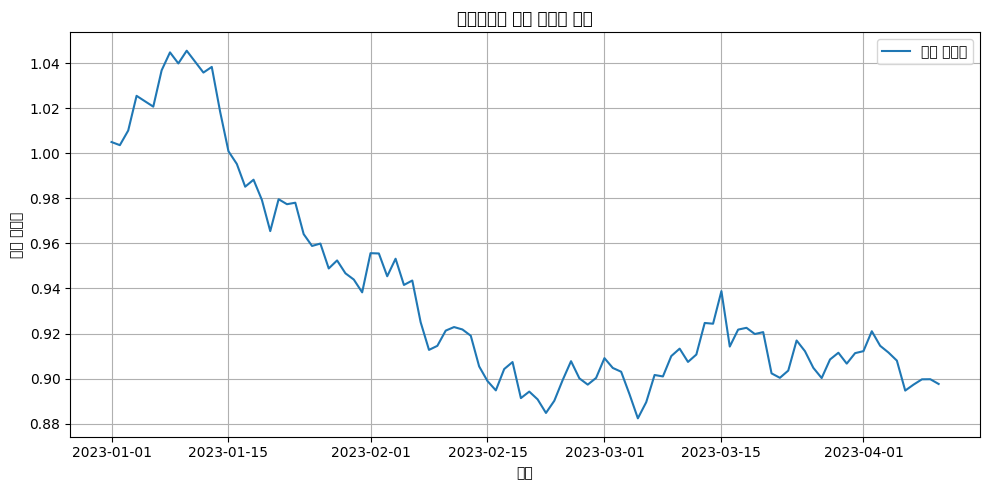

In [437]:
# 4. 누적 수익률 계산
cumulative_returns = (1 + returns).cumprod()

# 5. 연환산 수익률, 샤프비율 계산 (empyrical이 사용됨)
import empyrical as emp

annualized_return = emp.annual_return(returns)
sharpe_ratio = emp.sharpe_ratio(returns)

# 6. 결과 출력
print("♤ 수익률 분석 결과")
print(f"- 총 누적 수익률: {cumulative_returns[-1] - 1:.2%}")
print(f"- 연환산 수익률: {annualized_return:.2%}")
print(f"- 샤프 비율: {sharpe_ratio:.2f}")

# 7. 시각화 (간단한 누적 수익률)
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label="누적 수익률")
plt.title("포트폴리오 누적 수익률 추이")
plt.xlabel("날짜")
plt.ylabel("누적 수익률")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


20. PyFolio 관련 수익률 지표 분석
* 설명:
    * pyfolio로 실패하여 챗의 도움을 받아 empyrical(임피리컬)로 대체된 코드로 실행
    * empyrical은 양적 금융에서 일반적으로 사용되는 성능 및 위험 통계가 포함된 Python 라이브러리임

In [ ]:
!pip install empyrical
!pip install pyfolio


In [439]:
import pyfolio as pf
import numpy as np
import pandas as pd
import empyrical as emp
import matplotlib.pyplot as plt

# 시뮬레이션 수익률
np.random.seed(42)
portfolio_returns = np.random.randn(100) / 100
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
returns = pd.Series(portfolio_returns, index=dates)

# 지표 계산
cum_returns = (1 + returns).cumprod()
annualized_return = emp.annual_return(returns)
sharpe_ratio = emp.sharpe_ratio(returns)
max_drawdown = emp.max_drawdown(returns)
var = emp.value_at_risk(returns)
cvar = emp.conditional_value_at_risk(returns)

# 출력
print(f"누적 수익률: {(cum_returns[-1] - 1):.2%}")
print(f"연환산 수익률: {annualized_return:.2%}")
print(f"샤프 비율: {sharpe_ratio:.2f}")
print(f"최대 낙폭: {max_drawdown:.2%}")
print(f"VaR (5%): {var:.2%}")
print(f"CVaR (5%): {cvar:.2%}")


누적 수익률: -10.24%
연환산 수익률: -23.83%
샤프 비율: -1.82
최대 낙폭: -15.60%
VaR (5%): -1.73%
CVaR (5%): -2.05%


21. 수익률 분석 및 시각화를 위한 PyFolio의 대표적인 tear_sheet
* 설명:
    * prices	누적 랜덤 워크 방식으로 가격 시계열 생성
    * returns	일간 수익률 (퍼센트 변화) 계산
    * empyrical	연환산 수익률, 샤프 비율, 최대 낙폭, VaR, CVaR 계산
    * pf.create_returns_tear_sheet()	수익률, 누적수익률, 롤링 샤프비율 등 시각화 자동 보고서 생성
    * pf.create_bayesian_tear_sheet()	베이지안 수익률 분석 시트 (희귀 사용)
    * pf.create_round_trip_tear_sheet()	거래 단위 전략일 때 진입/청산 분석 (Zipline 필요)

In [22]:
# 1. 필요한 패키지 설치 (Jupyter 환경에서 실행)
# !pip install pyfolio
# !pip install empyrical

import pyfolio as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2. 가상 수익률 시뮬레이션
np.random.seed(42)
prices = 100 + np.cumsum(np.random.randn(100))  # 누적 가격 시계열 생성

# 3. 수익률로 변환 (날짜 포함)
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
prices_series = pd.Series(prices, index=dates)
returns = prices_series.pct_change().dropna()

print(returns.head())
print(f"수익률 데이터 개수: {len(returns)}")

# 4. 지표 계산
import empyrical as emp
cumulative_return = (1 + returns).cumprod()[-1] - 1
annualized_return = emp.annual_return(returns)
sharpe_ratio = emp.sharpe_ratio(returns)
max_drawdown = emp.max_drawdown(returns)
var = emp.value_at_risk(returns)
cvar = emp.conditional_value_at_risk(returns)

# 5. 결과 출력
print("✅ PyFolio 기반 수익률 분석")
print(f"누적 수익률: {cumulative_return:.2%}")
print(f"연환산 수익률: {annualized_return:.2%}")
print(f"샤프 비율: {sharpe_ratio:.2f}")
print(f"최대 낙폭: {max_drawdown:.2%}")
print(f"VaR (5%): {var:.2%}")
print(f"CVaR (5%): {cvar:.2%}")

# 6. 시각화 리포트 생성 (Jupyter에서만 작동)
pf.create_returns_tear_sheet(returns)    # pandas 버전문제
# pf.create_bayesian_tear_sheet(returns)      # 조건부: bayesian 옵션 필요
# pf.create_round_trip_tear_sheet(returns)    # 거래 상세 필요


2023-01-02   -0.001376
2023-01-03    0.006454
2023-01-04    0.015079
2023-01-05   -0.002284
2023-01-06   -0.002289
Freq: D, dtype: float64
수익률 데이터 개수: 99
✅ PyFolio 기반 수익률 분석
누적 수익률: -10.83%
연환산 수익률: -25.30%
샤프 비율: -1.82
최대 낙폭: -16.01%
VaR (5%): -1.71%
CVaR (5%): -2.16%


Start date,2023-01-02
End date,2023-04-10
Total months,4
,Backtest
Annual return,-25.3%
Cumulative returns,-10.8%
Annual volatility,15.4%
Sharpe ratio,-1.82
Calmar ratio,-1.58
Stability,0.63
Max drawdown,-16.0%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
!pip uninstall -y pandas
!pip install pandas==1.5.3

In [5]:
import pandas as pd
print(pd.__version__)


1.5.3


## 시각화 도구

## Matplotlib (22~25)

22. 가상의 거래 전략 수익률 그래프
* 설명:
    * 정규분포 수익률 생성 후 누적합 → 누적 수익률 시계열
    * 선 그래프 시각화 (제목, 축 라벨, 범례, 그리드 포함)

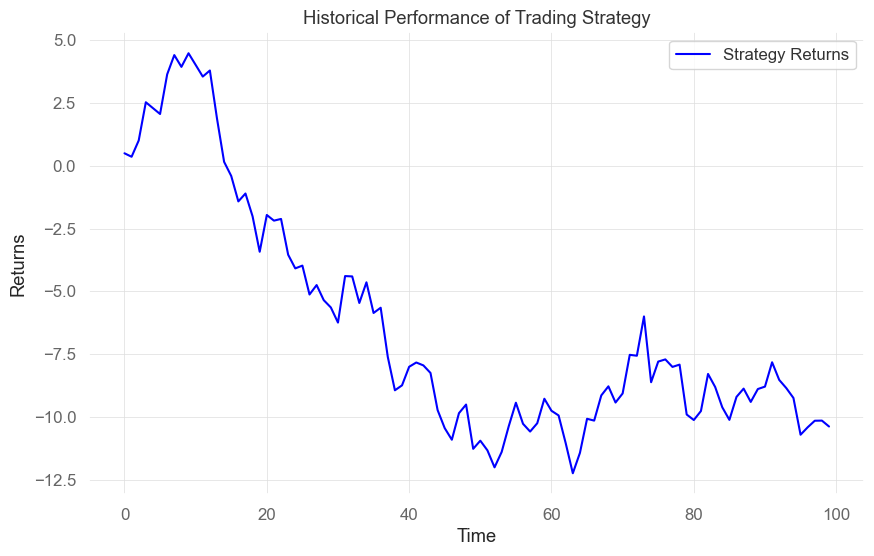

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 전략 수익률 시뮬레이션 (누적합)
np.random.seed(42)
returns = np.random.randn(100).cumsum()

# 2. 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Strategy Returns', color='blue')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Historical Performance of Trading Strategy')
plt.legend()
plt.grid(True)
plt.show()


23. 초록색 막대가 높이에 따라 자산별 성과를 시각화
* 설명:
    * X축: Asset A / B / C
    * Y축: 각각의 수익률 (0.05, 0.03, 0.08)

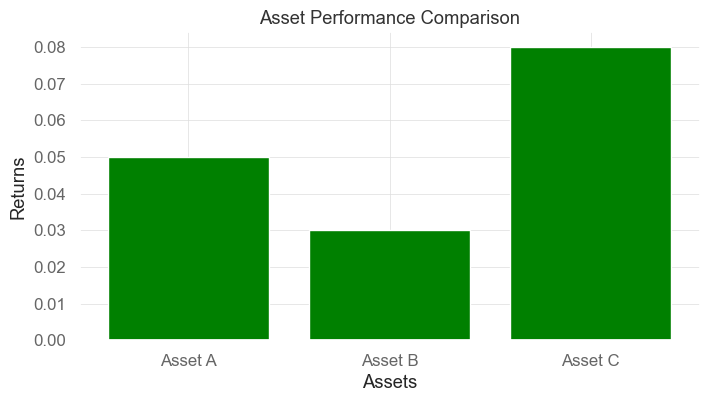

In [24]:
import matplotlib.pyplot as plt

# 1. 자산별 수익률 시뮬레이션
assets = ['Asset A', 'Asset B', 'Asset C']
returns = [0.05, 0.03, 0.08]  # 각각 5%, 3%, 8%

# 2. 막대 그래프 생성
plt.figure(figsize=(8, 4))  # 그래프 크기 설정 (가로 x 세로)
plt.bar(assets, returns, color='green')  # 초록색 막대그래프

# 3. 축 및 제목 설정
plt.xlabel('Assets')             # x축 라벨
plt.ylabel('Returns')            # y축 라벨
plt.title('Asset Performance Comparison')  # 그래프 제목

# 4. 그래프 출력
plt.show()


24. 캔들스틱 차트(candlestick chart)
* 설명:
    * matplotlib.finance.candlestick_ohlc: 더 이상 사용되지 않음 → mplfinance나 mpl_finance로 대체해야 함

In [ ]:
!pip install yfinance mplfinance


In [ ]:
!pip uninstall -y pandas
!pip install pandas

In [1]:
import pandas as pd
print(pd.__version__)


2.3.1


In [62]:
import matplotlib.dates as mdates
import yfinance as yf
import matplotlib.pyplot as pit
from matplotlib.finance import candlestick_ohlc
# Fetch historical price data
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Create a candlestick chart with customizations
fig, ax = plt.subplots(figsize=(10,6))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('AAPL Candlestick Chart')

# Convert the date, open, high, low, and close prices to the required format
data['Date'] = mdates.date2num(data.index.to_pydatetime())
ohlc = data[['Date', 'Open', 'High', 'Low', 'Close']].values

candlestick_ohlc(ax, ohlc, width=20)
 
plt.show()

ModuleNotFoundError: No module named 'matplotlib.finance'

C:\Users\jj\AppData\Local\Temp\ipykernel_25380\675042583.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2025-07-01', end='2025-07-31', group_by='ticker')
[*********************100%***********************]  1 of 1 completed


data.head() >>>
 Ticker            AAPL                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2025-07-01  206.669998  210.190002  206.139999  207.820007  78788900
2025-07-02  208.910004  213.339996  208.139999  212.440002  67941800
2025-07-03  212.149994  214.649994  211.809998  213.550003  34955800
2025-07-07  212.679993  216.229996  208.800003  209.949997  50229000
2025-07-08  210.100006  211.429993  208.449997  210.009995  42848900
ohlcv.head() >>>
 Price             Open        High         Low       Close      Volume
Date                                                                  
2025-07-01  206.669998  210.190002  206.139999  207.820007  78788900.0
2025-07-02  208.910004  213.339996  208.139999  212.440002  67941800.0
2025-07-03  212.149994  214.649994  211.809998  213.550003  34955800.0
2025-07-07  212.679993  216.229996  208.800003  209.949997

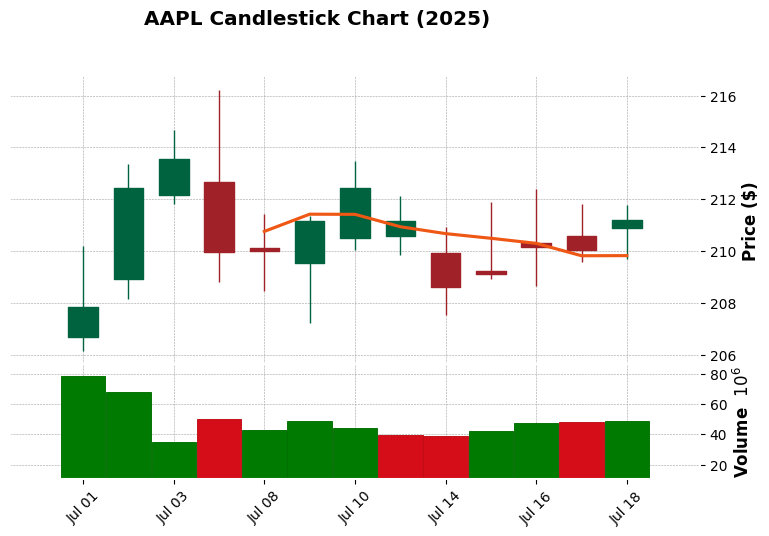

In [39]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# 1. 데이터 가져오기
data = yf.download('AAPL', start='2025-07-01', end='2025-07-31', group_by='ticker')

print("data.head() >>>\n", data.head())

# 2. 필요한 컬럼만 필터링하고 NaN 제거 + float 형변환
data.columns = data.columns.get_level_values(1)  # 'AAPL' 부분 제거

ohlcv = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
ohlcv.dropna(inplace=True)
ohlcv.index.name = 'Date'
ohlcv = ohlcv.astype(float)

print("ohlcv.head() >>>\n", ohlcv.head())

# 3. 캔들차트 그리기
mpf.plot(
    ohlcv,
    type='candle',
    style='charles',
    title='AAPL Candlestick Chart (2025)',
    ylabel='Price ($)',
    volume=True,
    mav=(5, 20),
    figratio=(10, 6)
)


25. 포트폴리오 자산 배분 파이 차트
* 설명:
    * allocation	각 자산의 포트폴리오 내 비율 (합계는 1 또는 100%)
    * plt.pie()	원형 차트를 생성하는 함수
    * labels=assets	각 파이 조각의 이름 설정
    * autopct='%.1f%%'	소수점 1자리로 퍼센트를 표시
    * startangle=140	차트가 시작되는 각도. 시각적으로 보기 좋게 회전
    * plt.figure(figsize=(8, 8))	출력 이미지의 크기 지정 (가로 8, 세로 8)
    * plt.title()	차트의 제목 설정
    * plt.show()	차트를 화면에 표시

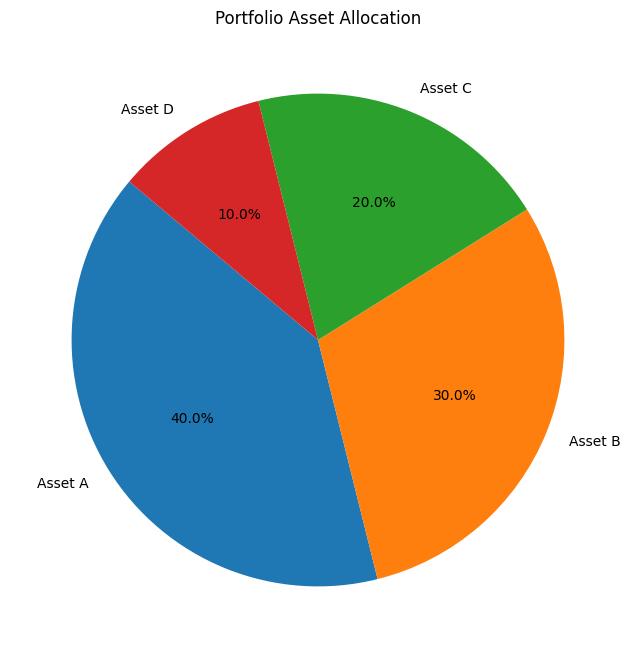

In [63]:
import matplotlib.pyplot as plt

# 1. 자산 비중과 이름 정의
allocation = [0.4, 0.3, 0.2, 0.1]
assets = ['Asset A', 'Asset B', 'Asset C', 'Asset D']

# 2. 파이 차트 생성
plt.figure(figsize=(8, 8))  # 정사각형 비율로 차트 크기 지정
plt.pie(
    allocation,               # 자산 비중
    labels=assets,            # 자산 이름 레이블
    autopct='%.1f%%',         # 비중을 소수점 한 자리로 표기
    startangle=140            # 시작 각도 조정 (시계 반대방향)
)

# 3. 제목 및 출력
plt.title('Portfolio Asset Allocation')
plt.show()


## Plotly (26~28)
* 사용자가 데이터와 직접 상호 작용할 수 있는 대화형 그래프

26. Plotly 산점도 시각화
* 설명: 
    * px.scatter()	Plotly Express로 상호작용 가능한 산점도 생성
    * x='Asset A', y='Asset B'	X축과 Y축에 사용할 컬럼 지정
    * fig.update_traces()	산점도 점들의 크기, 색상, 스타일 등 설정 가능
    * fig.show()	인터랙티브 그래프를 브라우저 또는 Jupyter에서 출력

In [ ]:
!pip install plotly

In [1]:
!pip install nbformat>=4.2.0



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\jj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import plotly.express as px
import pandas as pd
import numpy as np

# 1. 가상의 거래 데이터 생성
np.random.seed(42)  # 재현 가능성을 위해 시드 고정
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Asset A': np.random.randn(100),
    'Asset B': np.random.randn(100)
})

# 2. Plotly 산점도 생성
fig = px.scatter(data, x='Asset A', y='Asset B', title='Interactive Scatter Plot')

# 3. 마커 크기 조정
fig.update_traces(marker=dict(size=5))

# 4. 그래프 표시
fig.show()


27. 대화형 캔들 차트
* 설명: 
    * yfinance.download()	Yahoo Finance에서 AAPL의 2023년 주가 데이터를 가져옵니다.
    * plotly.graph_objects	인터랙티브한 그래프를 생성하는 Plotly 모듈입니다.
    * go.Candlestick()	캔들스틱 차트 객체를 생성합니다. 각 봉은 Open, High, Low, Close 값을 시각화합니다.
    * xaxis_rangeslider_visible=True	차트 하단에 날짜 범위를 조절할 수 있는 슬라이더를 추가합니다.
    * fig.show()	인터랙티브 차트를 화면에 렌더링합니다. Jupyter나 웹 환경에서 동작합니다.

In [12]:
import plotly.graph_objects as go
import yfinance as yf

# 1. 주가 데이터 다운로드
data = yf.download('AAPL', start='2025-01-01', end='2025-07-31', group_by='ticker')

data.columns = data.columns.get_level_values(1)  # 'AAPL' 부분 제거
data.dropna(inplace=True)
data.index.name = 'Date'
data = data.astype(float)

print("data.head() >>>\n", data.head())

# 2. 캔들차트 생성
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])

# 3. 차트 레이아웃 설정
fig.update_layout(
    title='📈 Interactive Candlestick Chart (AAPL)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True  # 하단에 범위 조절 슬라이더 표시
)

# 4. 차트 출력
fig.show()


C:\Users\jj\AppData\Local\Temp\ipykernel_27856\106823751.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

data.head() >>>
 Price             Open        High         Low       Close      Volume
Date                                                                  
2025-01-02  248.330961  248.500565  241.238085  243.263199  55740700.0
2025-01-03  242.774368  243.592387  241.307905  242.774368  40244100.0
2025-01-06  243.722074  246.734810  242.614744  244.410416  45045600.0
2025-01-07  242.395272  244.959095  240.769205  241.627136  40856000.0
2025-01-08  241.337815  243.123515  239.472320  242.115936  37628900.0


28. 시간 경과에 따른 포트폴리오의 성과
* 설명:
    * px.line()	Plotly Express를 이용해 라인 차트를 생성합니다. x축은 날짜, y축은 수익률입니다.
    * mode='lines+markers'	선과 함께 데이터 점(마커)을 표시합니다.
    * hovertemplate='%{y:.2f}%'	툴팁에 y값(수익률)을 소수점 2자리까지 퍼센트로 보여줍니다.
    * fig.show()	브라우저나 Jupyter 환경에서 인터랙티브 차트를 표시합니다.

In [15]:
import plotly.express as px
import pandas as pd
import numpy as np  # pd.np는 더 이상 사용되지 않음

# 1. 샘플 포트폴리오 수익률 데이터 생성
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Portfolio Returns': 0.02 + 0.01 * np.random.randn(100).cumsum()
})

# 2. 인터랙티브 라인 차트 생성
fig = px.line(data, x='Date', y='Portfolio Returns', title='📈 Portfolio Returns Over Time')

# 3. 마커와 커스텀 툴팁 추가
fig.update_traces(mode='lines+markers', hovertemplate='%{y:.2f}%')

# 4. 차트 출력
fig.show()


## seaborn (29~30)

29. 수익률의 분포가 정규분포를 따르는지 시각적으로 확인
* 설명: 
    * KDE: 커널 밀도 추정치

In [ ]:
!pip install seaborn

C:\Users\jj\AppData\Local\Temp\ipykernel_27856\1296645720.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




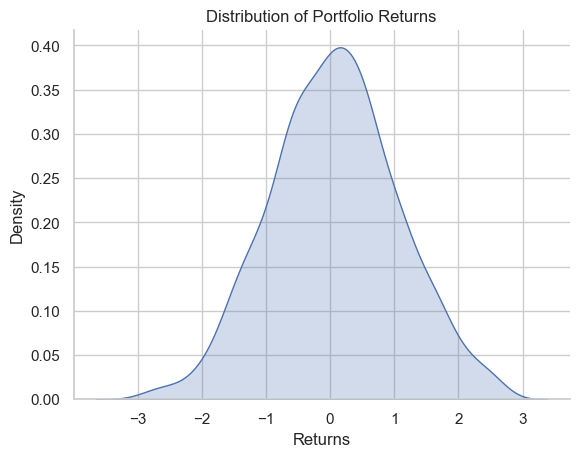

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  

# 1. 샘플 포트폴리오 수익률 생성
returns = np.random.randn(1000)  

# 2. Seaborn 스타일 설정 및 KDE 플롯 생성
sns.set(style="whitegrid")  
sns.kdeplot(data=returns, shade=True)

# 3. 상단과 우측 경계선 제거
sns.despine()

# 4. 레이블 및 제목 설정
plt.xlabel("Returns") 
plt.ylabel("Density") 
plt.title("Distribution of Portfolio Returns")

# 5. 그래프 출력
plt.show()


30. 5개의 자산에 대해 서로 간의 관계(상관)를 시각적으로 파악할 수 있는 페어플롯(pairplot)
* 설명:
    * np.random.randn(100, 5)	5개 자산의 100일간 수익률을 무작위로 생성

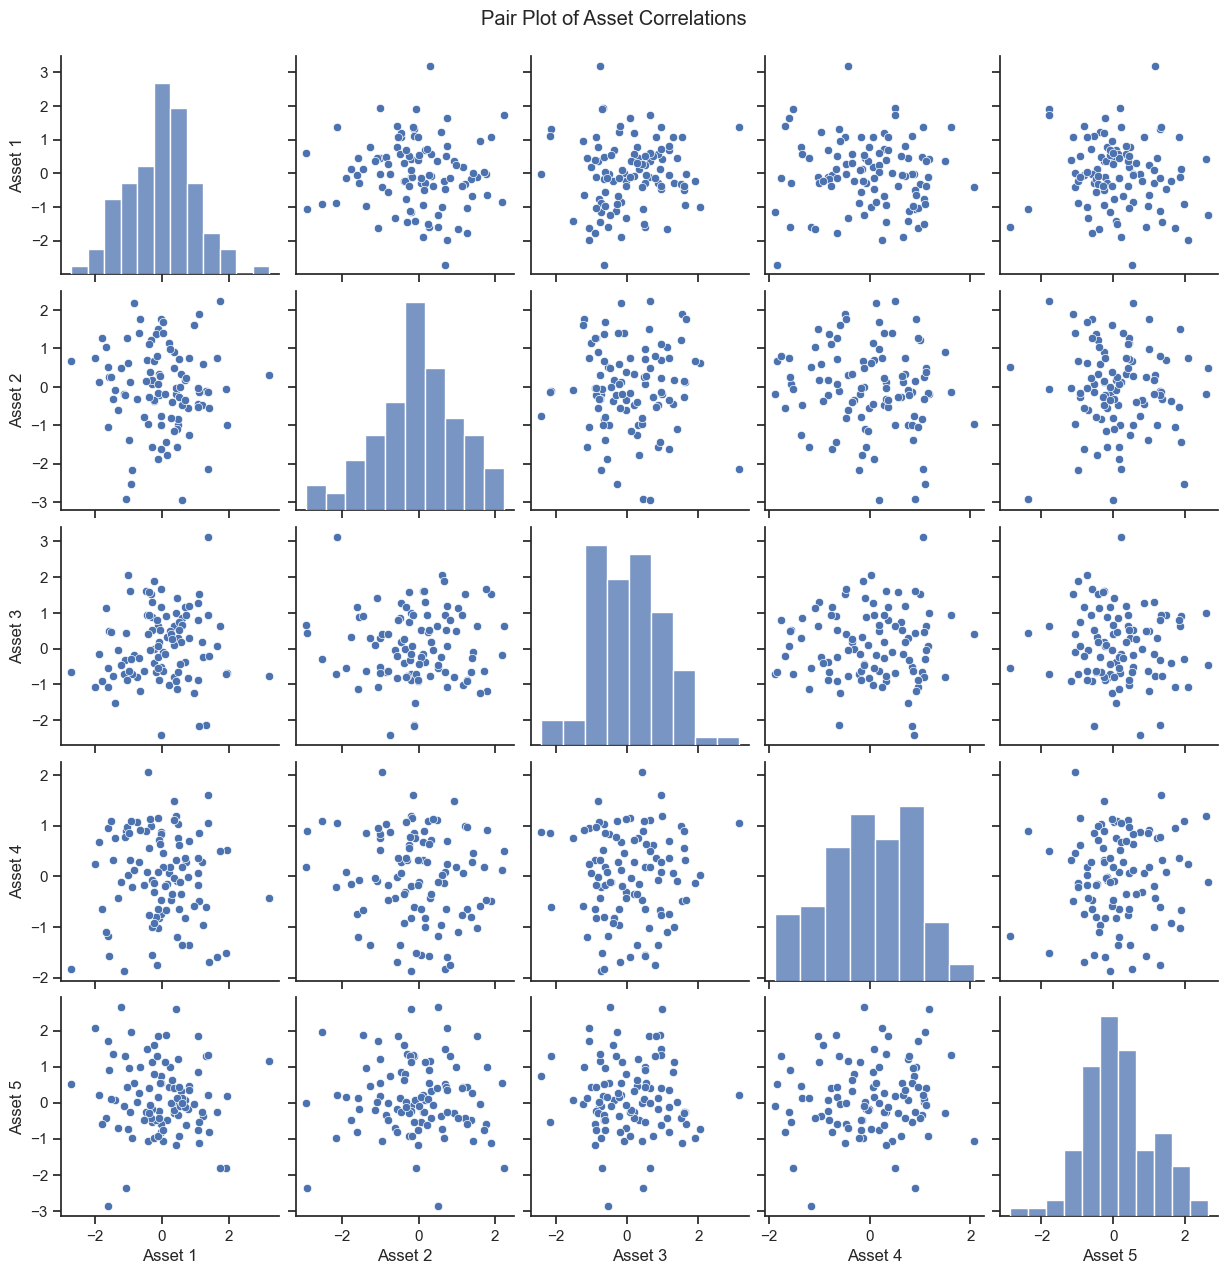

In [18]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 오타: pit → plt

# 1. 상관관계 행렬 시뮬레이션 (5개 자산, 100일 데이터)
data = np.random.randn(100, 5)  # shape=(100, 5)로 열이 자산
corr_matrix = np.corrcoef(data, rowvar=False)  # 열 간 상관관계 계산

# 2. 상관행렬을 데이터프레임으로 변환
corr_df = pd.DataFrame(data, columns=[f'Asset {i}' for i in range(1, 6)])

# 3. Seaborn 스타일 설정
sns.set(style='ticks')  # 오타: '*ticksn → 'ticks'

# 4. pairplot(산점도 행렬) 생성
sns.pairplot(corr_df)

# 5. 전체 그래프 제목 추가
plt.suptitle('Pair Plot of Asset Correlations', y=1.02)

# 6. 그래프 출력
plt.show()


## Additional libraries and tools (31~32)

31. MACD (이동평균 수렴 확산 지수) 계산
* 설명:
    * ta-lib 패키지 설치를 실패하여 실행해 보지 못함
    * talib.MACD(...)	종가(Close)를 기반으로 MACD 지표와 Signal 선을 계산
    * MACD	12일 EMA - 26일 EMA (추세 강도 파악용 지표)
    * Signal	MACD의 9일 EMA로, 매수/매도 신호로 사용
    * yfinance.download()	야후 파이낸스에서 주가 데이터 다운로드
    * matplotlib.pyplot	MACD 선과 시그널 선을 시각화하여 추세 전환점을 쉽게 관찰 가능

In [ ]:
!pip install ta-lib

In [6]:
# 1. 라이브러리 임포트
import talib
import yfinance as yf
import matplotlib.pyplot as plt

# 2. AAPL(애플)의 주가 데이터를 다운로드
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# 3. MACD (이동평균 수렴 확산 지수) 계산
# 기본 파라미터: fast=12, slow=26, signal=9
data['MACD'], data['Signal'] = talib.MACD(data['Close'])

# 4. MACD 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MACD'], label='MACD Line')
plt.plot(data.index, data['Signal'], label='Signal Line', linestyle='--')
plt.title('AAPL MACD Indicator (2023)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'talib'

32. Fastquant SMA 전략 백테스트
* 설명:
    * 오류로 실행 못함
    * : fastquant 내부 코드에서 사용 중인 pandas.io.json.json_normalize가 pandas 최신 버전에서 제거되었기 때문
    * df["SMA_50"]	종가 기준 50일 이동평균 계산
    * df["signal"]	매수/매도 시그널을 저장하는 열
    * signal = 1	매수 시그널 (골든 크로스)
    * signal = -1	매도 시그널 (데드 크로스)
    * backtest()	Fastquant의 사용자 전략 백테스트 함수
    * "custom"	사용자 정의 전략 키워드
    * buy_prop, sell_prop	매수/매도 비율 (100%)

In [ ]:
!pip install fastquant

In [1]:
# 1. 임포트
from fastquant import backtest
import pandas as pd

# 2. 전략 함수 정의
def my_strategy(df):
    # 50일 단순 이동평균선(SMA) 계산
    df["SMA_50"] = df["close"].rolling(window=50).mean()

    # 매수/매도 시그널 초기화
    df["signal"] = 0

    # 매수 조건: 종가가 50일 평균선을 상향 돌파
    df.loc[df["close"] > df["SMA_50"], "signal"] = 1

    # 매도 조건: 종가가 50일 평균선 하향 돌파
    df.loc[df["close"] < df["SMA_50"], "signal"] = -1

    # 백테스트 파라미터
    init_cash = 10000
    buy_prop = 1.0   # 100% 매수
    sell_prop = 1.0  # 100% 매도

    # Fastquant 백테스트 실행
    result = backtest(
        "custom", df,
        init_cash=init_cash,
        buy_prop=buy_prop,
        sell_prop=sell_prop
    )

    return result

# 3. 백테스트 실행 (예: 사용자 데이터 사용 시)
# 예시로 Yahoo Finance에서 데이터를 로딩할 수 있음
# from fastquant import get_stock_data
# data = get_stock_data("AAPL", "2022-01-01", "2023-01-01")

# 예시용 가짜 데이터 (실제 사용 시에는 위 get_stock_data 사용)
# df = pd.read_csv("your_price_data.csv")

# 4. 전략 실행 및 결과 출력
# result = my_strategy(df)
# print(result)


ImportError: cannot import name 'json_normalize' from 'pandas.io.json' (C:\Users\jj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\json\__init__.py)